<a href="https://colab.research.google.com/github/rfumfum2022/Proyecto-Calidad-del-Aire/blob/main/Plantilla_CO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<html>
  <header>
    <table>
      <th>
        <a href='https://www3.gobiernodecanarias.org/medusa/edublog/iesandresbello/' title='WEB I.E.S. ANDRéS BELLO'>   
         <img src='https://i0.wp.com/www3.gobiernodecanarias.org/medusa/edublog/iesandresbello/wp-content/uploads/sites/121/2021/09/logo-ab-png.png?fit=512%2C511&ssl=1' width='90' hight='90'>   
      </th>
      <th> 
         <a href='https://thingspeak.com/login?skipSSOCheck=true' title='WEB THINGSPEAK'>  
         <style> h1 { color: #FF0000; } </style>
            <h1 style="color:blue;">PLANTILLA TRATAMIENTO DE DATOS CO2 THINGSPEAK</h1>
          </a>  
           <a href='https://www3.gobiernodecanarias.org/medusa/edublog/iesandresbello/' title='WEB I.E.S. ANDRéS BELLO'>     
             <h3>I.E.S. ANDRéS BELLO (38006150)</h3>
             </a>
      </th>   
        </table>   
    </header>
</htlm>


---



***ACCESO AL DRIVE DE LA CUENTA DE GOOGLE***

---



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




---


INSTALACIóN DE LAS ***LIBRERíAS*** NECESARIAS PARA PODER IMPORTAR LOS 
***MóDULOS***

---



In [ ]:
!pip3 install hvplot

In [ ]:
!pip3 install matplotlib

In [ ]:
!pip3 install seaborn



---


IMPORTAMOS LOS ***MóDULOS*** DE LA ***LIBRERíAS*** QUE NECESITAMOS PARA PODER 
TRABAJAR


---



In [ ]:
import pandas as pd
import numpy as np
import panel as pn
pn.extension('tabulator')

import hvplot.pandas

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates



---


CUATRO CANALES DE ***THINGSPEAK*** CON SUS RESPECTIVAS ***APIs*** 

---



In [ ]:
canales=[ "https://api.thingspeak.com/channels/1795144/feeds.csv?api_key=ETPVXJBUS5L9MCAU", 
         'https://api.thingspeak.com/channels/1801920/feeds.csv?api_key=BKUIR2YA6C7DXYWP',
         'https://api.thingspeak.com/channels/1801921/feeds.csv?api_key=CB11V75KNDIOA7BH',
         'https://api.thingspeak.com/channels/1801923/feeds.json?api_key=OZWH24YZO14O0UA3']
         

Canal_1=ÁGORA, Canal_2=HOGAR, Canal_3=AULA_5, Canal_4=AULA_10



---


ELECCIóN DEL CANAL A ANALIZAR

---



In [ ]:
numero = int(input('Qué canal analizamos??'))
canal = canales[numero-1]

Qué canal analizamos??2




---


LEEMOS EL ***csv*** DE DATOS DE ***THINGSPEAK*** Y CREAMOS UN ***dataframe*** CON ***pandas***

---



In [ ]:
df = pd.read_csv(canal)
df.columns

Index(['created_at', 'entry_id', 'field1', 'field2', 'field3'], dtype='object')

In [ ]:
#df = pd.read_csv("https://api.thingspeak.com/channels/1801923/feeds.csv?api_key=OZWH24YZO14O0UA3&start=2022-11-09%2022:21:50&end=2022-11-09%2022:22:00")
#df.columns



---


RENOMBRAMOS LAS COLUMNAS DEL ***dataframe***

---



In [ ]:
columnas =['FECHA','Id_número','CO2(ppm)','Temperatura(ºC)','Humedad(%)']
df_final = df.set_axis(columnas, axis=1)
df_final.head()

,FECHA,Id_número,CO2(ppm),Temperatura(ºC),Humedad(%)
0,2022-11-12 19:14:48 UTC,152268,241.62610,31.2,54.3
1,2022-11-12 19:15:09 UTC,152269,246.58568,31.1,54.4
2,2022-11-12 19:15:30 UTC,152270,286.11163,31.1,54.3
3,2022-11-12 19:15:52 UTC,152271,286.11163,31.1,54.3
4,2022-11-12 19:16:13 UTC,152272,286.11163,31.2,54.4


In [ ]:
#df.rename({'creates_at':'FECHA','entry_id':'Id_número','field1':'CO2(ppm)','field2':'Temperatura(ºC)','field3':'Humedad(%)'}, axis=1)



---


TIPOS DE DATOS DEL ***dataframe***

---



In [ ]:
df_final.dtypes

FECHA               object
Id_número            int64
CO2(ppm)           float64
Temperatura(ºC)    float64
Humedad(%)         float64
dtype: object



---


CREAMOS ***MATRIZ ESTADíSTICA DESCRIPTIVA*** DE ***CO2(ppm), TEMPERATURA(ºC) Y HUMEDAD(%)***

---



In [ ]:
df_final.describe()

,Id_número,CO2(ppm),Temperatura(ºC),Humedad(%)
count,100.000000,100.000000,95.000000,95.000000
mean,152317.500000,254.589425,31.169474,54.385263
std,29.011492,30.578604,0.052741,0.083753
min,152268.000000,191.602600,31.100000,54.200000
25%,152292.750000,231.918750,31.100000,54.300000
50%,152317.500000,272.471010,31.200000,54.400000
75%,152342.250000,280.598420,31.200000,54.400000
max,152367.000000,288.897000,31.300000,54.600000




---


ESTABLECEMOS LA COLUMNA ***fecha*** COMO ***índice*** DEL ***dataframe***

---



In [ ]:
df_final.set_index('FECHA', inplace = True)
df_final.head()

,Id_número,CO2(ppm),Temperatura(ºC),Humedad(%)
FECHA,,,,
2022-11-12 19:14:48 UTC,152268,241.62610,31.2,54.3
2022-11-12 19:15:09 UTC,152269,246.58568,31.1,54.4
2022-11-12 19:15:30 UTC,152270,286.11163,31.1,54.3
2022-11-12 19:15:52 UTC,152271,286.11163,31.1,54.3
2022-11-12 19:16:13 UTC,152272,286.11163,31.2,54.4




---


CREAMOS UN ***heatmap*** CON LA LIBRERíA ***seaborn*** QUE NOS DA LAS CORRELACIONES ENTRE LAS VARIABLES DEL ***dataframe***

---



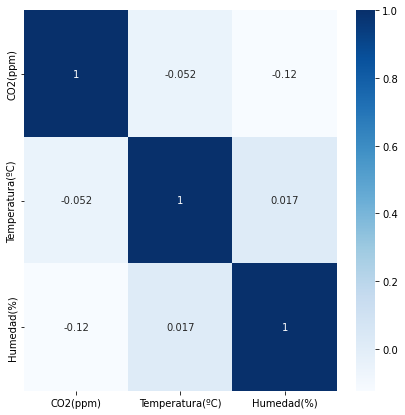

In [ ]:
#heatmap

plt.figure(figsize = (7,7))
sns.heatmap(df_final[['CO2(ppm)','Temperatura(ºC)','Humedad(%)']].corr(),annot=True, cmap='Blues')



---
AGRUPAR DATOS DE LOS ***CUATRO CANALES DE THINGSPEAK***


---

